### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [314]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


### Regression Questions

The conceptual questions (which do not require coding) are skipped in this notebook

In [315]:
# Question 1: Conceptual question; answer in MyEducator. Nothing to do here

In [316]:
# Question 2: Conceptual question; answer in MyEducator. Nothing to do here

In [317]:
# Question 3: Conceptual question; answer in MyEducator. Nothing to do here

In [318]:
# Question 4: Conceptual question; answer in MyEducator. Nothing to do here 

In [319]:
# Question 5: Conceptual question; answer in MyEducator. Nothing to do here

In [320]:
# Question 6: Download the StudentsPerformance.csv dataset that is provided with this exam. Import it into a DataFrame. Print a list of column names and their associated data types. Which columns would make sense to predict as a label in an MLR?
df = pd.read_csv('StudentsPerformance.csv')
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [321]:
# Question 7: Drop any rows that contain null values in any column using .dropna(). Use the statsmodels package to create an MLR/OLS model to predict math score as a function of the reading score and writing score. Do not split the data; use the entire dataset for training. Allow the y-intercept to vary.

# Which feature best predicts their math score?

df = df.dropna()
import statsmodels.api as sm

label = "math score"

y=df[label]
X=df[['reading score', 'writing score']]

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          2.25e-243
Time:                        18:28:04   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665

In [322]:
# Question 8: In the original DataFrame convert each of the non-numeric features into dummy codes. Generate an OLS/MLR model (using the statsmodels package) to predict math score. However, do not include either reading score or writing score as features; only include those dummy codes created from the categorical features. Do not split the data; use the entire dataset for training. Print the results summary.

# Do test preparation courses improve math scores?

dummies = df.select_dtypes(['object']).columns  # Creates a list of column names that are 'object' dtype
df = pd.get_dummies(df, columns=dummies)

df = df*1

label = "math score"
y=df[label]
X=df.drop(columns=[label, 'reading score', 'writing score'])

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           2.62e-55
Time:                        18:28:04   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [323]:
# Question 9: Generate OLS/MLR models to predict writing scores and reading scores using the same set of features. Similarly, drop the other two score features from each score model you create. For example, predict reading score, but do not include math score or writing score as features. Do not split the data; use the entire dataset for training. Print the results of each model summary. 

# Which score (reading, writing, or math) is most accurately predicted?

# Model to predict writing score
y_writing = df['writing score']
X_writing = df.drop(columns=['math score', 'reading score', 'writing score'])
X_writing = sm.add_constant(X_writing)
model_writing = sm.OLS(y_writing, X_writing).fit()
print("Writing Score Model Summary:")
print(model_writing.summary())

# Model to predict reading score
y_reading = df['reading score']
X_reading = df.drop(columns=['math score', 'reading score', 'writing score'])
X_reading = sm.add_constant(X_reading)
model_reading = sm.OLS(y_reading, X_reading).fit()
print("\nReading Score Model Summary:")
print(model_reading.summary())

# Compare R-squared values to determine the most accurately predicted score
r2_math = model.rsquared    
r2_writing = model_writing.rsquared
r2_reading = model_reading.rsquared

# Determine the most accurately predicted score
if r2_math == max(r2_math, r2_writing, r2_reading):
    print("\nMath score is most accurately predicted.")
elif r2_writing == max(r2_math, r2_writing, r2_reading):
    print("\nWriting score is most accurately predicted.")
else:
    print("\nReading score is most accurately predicted.")




Writing Score Model Summary:
                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     41.25
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           8.17e-79
Time:                        18:28:04   Log-Likelihood:                -3936.2
No. Observations:                1000   AIC:                             7898.
Df Residuals:                     987   BIC:                             7962.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [324]:
# Question 10: Using the last model you created to predict math score (which includes all of the dummy codes), what is the predicted math score of a child who is female, race/ethnicity_group C, parental level of education_some college, gets a reduced lunch, and has not taken a test preparation course? Print the predicted value.
import numpy as np

prediction = model_writing.predict([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

print(prediction)


[63.3476219]


### Classification


In [325]:
# Question 11: Conceptual question; answer in MyEducator. Nothing to do here

In [326]:
# Question 12: Conceptual question; answer in MyEducator. Nothing to do here

In [327]:
# Question 13: Conceptual question; answer in MyEducator. Nothing to do here

In [328]:
# Question 14: Conceptual question; answer in MyEducator. Nothing to do here

In [329]:
#  Question 15: Import all needed packages for classification modeling, splitting the data, and calculating fit metrics. Import the Lending Club dataset found at: http://www.ishelp.info/data/lc_xs.csv. Alternatively, if the server is down, you can also download this data file from the MyEducator assignment description. 

# How many records are in the dataset?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("lc_xs.csv")
df.shape[0]


20951

In [330]:
# Question 16: Run the code below. If you named your DataFrame something other than 'df', then be sure to change 'df' to whatever your DataFrame is named before running the code.

# Based on the results, do you believe that Lending Club is doing a decent job of determining who will pay back their loans?

df['loan_status'].value_counts()




loan_status
Current               13268
Fully Paid             5484
Charged Off            1708
Late (31-120 days)      313
In Grace Period         106
Late (16-30 days)        72
Name: count, dtype: int64

In [331]:
# QUESTION 17: Drop the features: loan_status_numeric, issue_d, title, emp_title, emp_length, earliest_cr_line, mths_since_last_delinq, mths_since_last_record, sub_grade. Pseudocode:
#      df.drop(columns=[name, name, ..., name], inplace=True)

# Since customers who are Current, In Grace Period, Late (16-30 days), and Late (31-120 days) have not finished their loan, drop all records except for those which are Fully Paid or Charged Off. Pseudocode: 
#      df.loc[(df['column_name'] == A) | (df['column_name'] == B)]

# Drop any rows containing null data using the command: df.dropna(inplace=True). 

# Finally, create dummy codes for all remaining categorical features (but not for the label loan_status)

# Print out the first five records of the resulting DataFrame. How many columns are left after completing each of these tasks?

# Dropping specified features
df.drop(columns=['loan_status_numeric', 'issue_d', 'title', 'emp_title', 'emp_length', 'earliest_cr_line', 
                 'mths_since_last_delinq', 'mths_since_last_record', 'sub_grade'], inplace=True)

# Keeping only the records for 'Fully Paid' or 'Charged Off' loans
df = df.loc[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

# Dropping rows with any null data
df.dropna(inplace=True)

# Creating dummy codes for categorical features, excluding 'loan_status'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('loan_status')
df = pd.get_dummies(df, columns=categorical_columns)

# Printing the first five records and counting the remaining columns
print(df.head())
print("Number of columns left:", df.shape[1])







    loan_status  loan_amnt  int_rate  installment   total_pymnt  \
1   Charged Off       8000      8.39       252.14   5384.790000   
2   Charged Off      35000     18.45       897.37   2763.860000   
3    Fully Paid      15000     11.39       493.86  15762.912745   
6    Fully Paid      27250     17.27       975.21  27961.440003   
10  Charged Off      30000      9.44       629.18  10403.600000   

    total_rec_prncp  total_rec_int  total_rec_late_fee  annual_inc  \
1           3749.64         785.15                 0.0     59000.0   
2           1094.39        1669.47                 0.0     50000.0   
3          15000.00         762.91                 0.0     98000.0   
6          27250.00         711.44                 0.0    120000.0   
10          4499.17        2406.08                 0.0     60000.0   

    acc_now_delinq  ...  verification_status_Not Verified  \
1              0.0  ...                              True   
2              0.0  ...                             Fa

In [332]:
# Question 18: Set the y and X datasets assuming that loan_status will be the label. Print the first 5 records of X

y = df['loan_status']
X = df.drop(columns=['loan_status'])
X.head()




,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,8000,8.39,252.14,5384.790000,3749.64,785.15,0.0,59000.0,0.0,0.0,...,True,False,False,False,True,False,False,False,False,False
2,35000,18.45,897.37,2763.860000,1094.39,1669.47,0.0,50000.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
3,15000,11.39,493.86,15762.912745,15000.00,762.91,0.0,98000.0,0.0,0.0,...,False,False,True,False,True,False,False,False,False,False
6,27250,17.27,975.21,27961.440003,27250.00,711.44,0.0,120000.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
10,30000,9.44,629.18,10403.600000,4499.17,2406.08,0.0,60000.0,0.0,0.0,...,False,True,False,False,True,False,False,False,False,False


In [333]:
# Question 19: Split the data using a 50/50 split and random seed = 12345

# Next, train a Decision Tree Classifier model using a random_state=12345 and fit the model with the appropriate data set

# Print the Accuracy score using either the .accuracy_score() or .score() method of the Decision Tree Classifier model object. Be sure to pass in the appropriate data into those objects. What is that score? Copy and paste the entire number with all decimals included



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)
model = DecisionTreeClassifier(random_state=12345)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)






0.9883040935672515

In [346]:
# Question 20: Predict the labels for test dataset and display them in a dataframe along with the actual values. Print only the LAST 10 records. Which row index was predicted incorrectly in these last 10 records? 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail(10)



,Actual,Predicted
20875,Charged Off,Charged Off
3411,Charged Off,Charged Off
3311,Charged Off,Charged Off
11648,Fully Paid,Fully Paid
20422,Fully Paid,Fully Paid
20190,Charged Off,Charged Off
20358,Fully Paid,Fully Paid
13148,Charged Off,Charged Off
6668,Charged Off,Charged Off
19710,Fully Paid,Fully Paid


## Clustering


In [335]:
# Question 21: Conceptual question; answer in MyEducator. Nothing to do here.

In [336]:
# Question 22: Conceptual question; answer in MyEducator. Nothing to do here.

In [337]:
# Question 23: Conceptual question; answer in MyEducator. Nothing to do here.

In [338]:
# Question 24: Conceptual question; answer in MyEducator. Nothing to do here.

In [339]:
# Question 25: Conceptual question; answer in MyEducator. Nothing to do here.

In [340]:
# Question 26: Import the necessary libraries to perform your Clustering analysis. Once again, use the Lending Club dataset (lc_xs.csv) but reimport a fresh copy into a DataFrame

# Next, remove all columns that are not numeric. Once quick way to do that is using the np.number method of the numpy package: df.select_dtypes(np.number)

# Also, remove loan_status_numeric from the DataFrame since that is typically considered a label and we are going to generate our own cluster/label.

# After completing the prior step, remove all rows that contain any null values (see the example code given to you above).

# Finally, scale the remaining DataFrame using a MinMaxScalar().

# Print the first 5 records. What is the loan amount of the second row after scaling (Index 1)?

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('lc_xs.csv')  # Make sure the file path is correct

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove 'loan_status_numeric' column
df = df.drop(columns=['loan_status_numeric'], errors='ignore')

# Remove rows with any null values
df.dropna(inplace=True)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the first 5 records
print(df_scaled.head())

# Print the loan amount of the second row (Index 1)
print("Loan amount of the second row after scaling:", df_scaled.iloc[1]['loan_amnt'])




   loan_amnt  int_rate  installment  total_pymnt  total_rec_prncp  \
0   0.615385  0.338006     0.406298     0.332336         0.208836   
1   0.435897  0.260125     0.272744     0.327031         0.237382   
2   0.102564  0.240654     0.099272     0.123910         0.125000   
3   0.102564  0.288941     0.101460     0.019922         0.017672   
4   0.076923  0.104361     0.070148     0.096487         0.100000   

   total_rec_int  total_rec_late_fee  annual_inc  acc_now_delinq  delinq_2yrs  \
0       0.362664            0.000000    0.078689             0.0     0.000000   
1       0.283325            0.000000    0.073189             0.0     0.111111   
2       0.031156            0.000000    0.048792             0.0     0.111111   
3       0.017134            0.000000    0.039034             0.0     0.111111   
4       0.018090            0.142694    0.117102             0.0     0.000000   

   ...  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0  ...                

For n_clusters = 2, the silhouette score is 0.22805204115701602
For n_clusters = 3, the silhouette score is 0.12553370683377066
For n_clusters = 4, the silhouette score is 0.10627851900009877
For n_clusters = 5, the silhouette score is 0.09564348714799474


For n_clusters = 6, the silhouette score is 0.09005066367967225
For n_clusters = 7, the silhouette score is 0.09139265884422576
For n_clusters = 8, the silhouette score is 0.08721383092183167
For n_clusters = 9, the silhouette score is 0.08900538567277541
For n_clusters = 10, the silhouette score is 0.09301833045266827
For n_clusters = 11, the silhouette score is 0.09054171515125617
For n_clusters = 12, the silhouette score is 0.09016144339061484
For n_clusters = 13, the silhouette score is 0.08403895827862576
For n_clusters = 14, the silhouette score is 0.09136902813805359
For n_clusters = 15, the silhouette score is 0.07973601914485419
For n_clusters = 16, the silhouette score is 0.0779918801527775
For n_clusters = 17, the silhouette score is 0.0733484940919529
For n_clusters = 18, the silhouette score is 0.08501054200235202
For n_clusters = 19, the silhouette score is 0.07915391603160846
For n_clusters = 20, the silhouette score is 0.08022264780588136


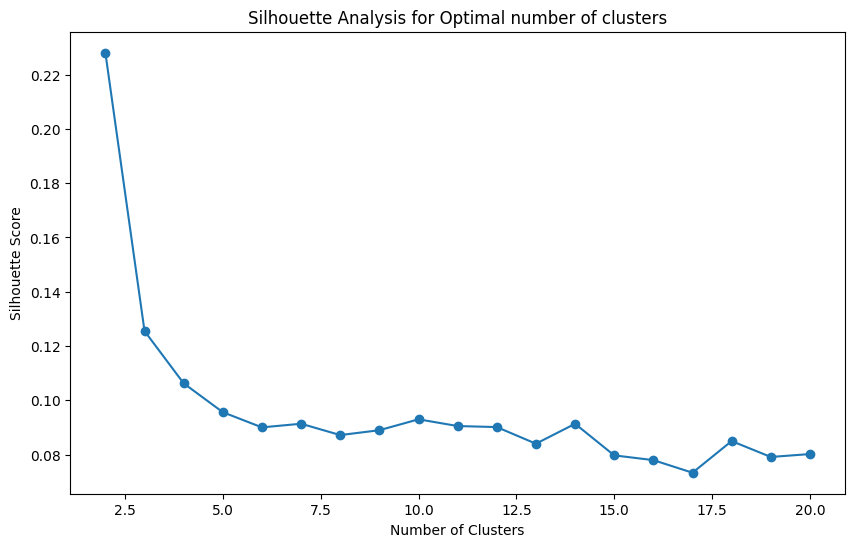

In [341]:
# Question 27: Next, let's perform a Silhouette analysis to determine the optimal number of clusters. Calculate a silhouette score for KMeans models with n number of clusters = 2 though 20. Plot the results. What is the optimal number of clusters?

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your scaled DataFrame

silhouette_scores = []
range_n_clusters = range(2, 21)

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit and predict to get the cluster labels
    cluster_labels = kmeans.fit_predict(df_scaled)
    
    # Calculate silhouette score and append to list
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal number of clusters")
plt.show()


In [342]:
# Question 28: Generate a KMeans model using two clusters and a random seed of 12345. Add the assigned clusters as a new column in DataFrame.

# Which cluster has the most assigned cases? 

from sklearn.cluster import KMeans

# Create a KMeans instance with 2 clusters and a random seed of 12345
kmeans = KMeans(n_clusters=2, random_state=12345)

# Fit the model
kmeans.fit(df_scaled)

# Add a new column to the DataFrame with the assigned cluster labels
df_scaled['cluster'] = kmeans.labels_

# Print the DataFrame with the new column
print(df_scaled.head())

# Count the number of occurrences of each cluster label
cluster_counts = df_scaled['cluster'].value_counts()

# Print the counts for each cluster
print(cluster_counts)

# Identify which cluster has the most assigned cases
most_assigned_cluster = cluster_counts.idxmax()
print("Cluster with the most assigned cases:", most_assigned_cluster)



   loan_amnt  int_rate  installment  total_pymnt  total_rec_prncp  \
0   0.615385  0.338006     0.406298     0.332336         0.208836   
1   0.435897  0.260125     0.272744     0.327031         0.237382   
2   0.102564  0.240654     0.099272     0.123910         0.125000   
3   0.102564  0.288941     0.101460     0.019922         0.017672   
4   0.076923  0.104361     0.070148     0.096487         0.100000   

   total_rec_int  total_rec_late_fee  annual_inc  acc_now_delinq  delinq_2yrs  \
0       0.362664            0.000000    0.078689             0.0     0.000000   
1       0.283325            0.000000    0.073189             0.0     0.111111   
2       0.031156            0.000000    0.048792             0.0     0.111111   
3       0.017134            0.000000    0.039034             0.0     0.111111   
4       0.018090            0.142694    0.117102             0.0     0.000000   

   ...  open_acc  pub_rec  revol_bal  revol_util  tot_coll_amt  tot_cur_bal  \
0  ...     0.150   

In [343]:
# Question 29: Create a new DataFrame that displays the means of each feature seperately for the cases assigned both clusters (just like the example in the book). 

# Which features played the largest role in determining clusters? Copy and paste the full name below exactly as it appears with no leading or trailing spaces.

# Group by the 'cluster' column and calculate the mean for each feature
cluster_means = df_scaled.groupby('cluster').mean()

# Print the resulting DataFrame
print(cluster_means)




         loan_amnt  int_rate  installment  total_pymnt  total_rec_prncp  \
cluster                                                                   
0         0.224906  0.326792     0.201018      0.13617         0.117128   
1         0.590893  0.414623     0.523230      0.43017         0.360157   

         total_rec_int  total_rec_late_fee  annual_inc  acc_now_delinq  \
cluster                                                                  
0             0.075468            0.005646    0.073883        0.003253   
1             0.249368            0.016781    0.118452        0.005376   

         delinq_2yrs  ...  mths_since_last_record  open_acc   pub_rec  \
cluster               ...                                               
0           0.053284  ...                0.593961  0.241729  0.007759   
1           0.047790  ...                0.525113  0.268280  0.009502   

         revol_bal  revol_util  tot_coll_amt  tot_cur_bal  total_acc  \
cluster                              

In [344]:
# Question 30: What is the predicted/assigned cluster for a new loan with the following values:? [0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]
# New loan data
new_loan = [[0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]]

# Predict the cluster for the new loan
predicted_cluster = kmeans.predict(new_loan)[0]
print("Predicted cluster for the new loan:", predicted_cluster)

Predicted cluster for the new loan: 1


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
